<a href="https://colab.research.google.com/github/Chanakarn06/multivariate-/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [27]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas


In [28]:
Name = 'ชนกานต์ พูลผล'
ID = '6230210467'

In [29]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [30]:
Data = DataGenerator(Name,ID)

021:22:10


In [31]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-4.537722,7.266307,8.277647,5.333037,0.135326,-6.602959,-2.569090,-2.460662,-3.458128,-0.661241,-0.192912,-6.031362,6.553900,4.776343,8.187041,-5.893913,2.695727,2.758724,-1.832187,-1.666498,5.323251,2.600428,14.532614,15.002138
1,9.048972,7.134933,1.759783,0.034717,8.250986,4.457631,-10.790035,3.649009,1.107221,0.736632,-0.457452,-1.781641,-5.243909,4.985990,5.103544,-6.044533,3.525429,3.263021,4.403556,-5.042170,-3.281565,-3.469476,14.269866,-15.347382
2,8.207557,9.221489,3.142432,-7.800994,-8.903069,-0.824537,-7.178304,-0.790042,-3.269673,-7.488747,-4.782331,-2.577739,3.474321,-4.071277,1.164568,-3.592699,-6.067020,-7.266478,-3.949880,-5.223433,-8.792920,5.637138,18.442977,30.185691
3,11.682951,6.281466,5.393395,-0.674409,8.594136,4.347096,-11.235947,3.894471,2.658678,0.185085,-2.813303,-1.443848,-3.635104,4.315976,3.645405,-6.312063,1.472157,4.238021,2.035570,-3.538829,-5.423032,-2.393155,12.562931,-9.965776
4,9.061801,0.086986,7.456516,7.835959,5.053796,9.440070,3.006729,-1.963116,-3.156712,7.647956,-7.566631,-1.521601,-4.194532,1.812146,7.602348,-3.924658,4.949151,5.064022,3.089132,-3.514878,5.411684,0.266841,0.173971,3.334206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.311523,-0.904654,9.165297,3.628016,-5.782000,-6.570243,7.230237,-1.185786,-1.942155,-7.232912,3.418986,7.572747,9.577475,-7.825424,7.149102,-6.908824,-2.450571,-4.185966,1.261364,1.958801,-0.121484,-1.554191,-1.809307,-5.770954
9996,7.842338,-0.796573,5.991055,7.505813,6.112663,8.112512,6.000871,0.037768,-5.231936,3.300707,-6.724084,-0.454427,-6.033146,4.417475,9.085679,-4.404652,5.987237,6.445583,0.887181,-6.112017,7.028998,-0.193996,-1.593146,1.030019
9997,-8.375086,-2.782101,4.931259,-10.261058,-5.846575,-8.975474,-4.501026,4.532442,-4.603057,1.470781,-8.752329,5.189381,-7.331412,-4.640731,0.670324,6.999508,3.641213,8.998121,6.776509,-2.721687,-2.565575,2.873913,-5.564201,16.369564
9998,0.764459,8.652329,-3.127344,7.200398,9.497322,5.160653,-6.298138,8.349976,-0.287924,8.751578,-7.162570,8.265871,5.223376,-6.629349,2.130710,-5.009280,-0.202760,0.205711,-8.487282,6.853373,8.010680,2.831422,17.304658,16.157111


เป็นการเตรียมข้อมูลเพื่อที่จะนำข้อมูลไปใช้ โดยจะตัดตัวที่มี correlation ออกไป เป็นการลดข้อมูลที่เหมือนกันออกไป

In [32]:
Data.shape #เป็นขนาดทั้งหมดของข้อมูล

(10000, 24)

In [33]:
corr = np.corrcoef(Data.to_numpy().T)

ต่อไปเป็นการดูขนาดของ corrcoef 

In [34]:
corr.shape

(24, 24)

In [115]:
for p in range(corr.shape[0]):
  for l in range(corr.shape[1]):
    if (p !=l) and (corr[p,l]== 1.):
      print(f'row = {p} column = {l} corrcoef = {corr[p,l]}')


row = 1 column = 22 corrcoef = 1.0
row = 21 column = 23 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


จากผลลัพธ์จะเห็นว่ามีข้อมูลที่ซ้ำกัน จึงต้องทำการตัดข้อมูลออก

In [126]:
Data.iloc[:6,10:23]

,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.192912,-6.031362,6.553900,4.776343,8.187041,-5.893913,2.695727,2.758724,-1.832187,-1.666498,5.323251,2.600428,14.532614
1,-0.457452,-1.781641,-5.243909,4.985990,5.103544,-6.044533,3.525429,3.263021,4.403556,-5.042170,-3.281565,-3.469476,14.269866
2,-4.782331,-2.577739,3.474321,-4.071277,1.164568,-3.592699,-6.067020,-7.266478,-3.949880,-5.223433,-8.792920,5.637138,18.442977
3,-2.813303,-1.443848,-3.635104,4.315976,3.645405,-6.312063,1.472157,4.238021,2.035570,-3.538829,-5.423032,-2.393155,12.562931
4,-7.566631,-1.521601,-4.194532,1.812146,7.602348,-3.924658,4.949151,5.064022,3.089132,-3.514878,5.411684,0.266841,0.173971
5,-7.244583,-2.504991,-6.478480,1.351478,7.642004,-3.861478,5.994247,5.884149,2.744381,-4.101236,7.134381,-0.157959,1.527763


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

ใช้วิธี Kmean


#**1) Import**

In [36]:
from sklearn.cluster import KMeans

#**2) Define**

In [40]:
kmeans = KMeans(n_clusters=3, random_state=2021)

# **3) Fit-Transform**

In [41]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

# **4)แสดงจุด cluster centers ที่คำนวณออกมาได้**

In [42]:
kmeans.cluster_centers_

array([[ -1.74614452,   5.01990685,   2.86364762,  -1.53152974,
         -0.84806108,  -3.57931057,  -4.84833156,   2.14076116,
         -3.52030898,   0.49530488,  -5.33239597,   1.79460932,
          1.75623235,  -3.73724468,   2.62710318,  -1.56550581,
         -0.11878818,   1.07505086,  -2.41955274,  -0.87987303,
          1.16348526,   3.41158638,  10.0398137 ,  19.05793191],
       [ -0.06412901,  -4.51225673,   6.22253194,  -3.2269512 ,
         -6.08859379,  -3.17695728,   3.43639431,  -4.33873044,
         -4.73102557,   7.57278776,   0.75839827,   4.86441192,
          7.96178553,  -4.47805369,   0.68598681,  -7.36481561,
          9.21835902,   6.27049844,   3.05073206,  -5.97899453,
          9.45978479,  -9.28651114,  -9.02451347, -44.4325557 ],
       [  5.76870478,   0.8236597 ,   1.95641514,   3.77606509,
          0.46254443,   0.53936512,   3.24707994,  -2.335075  ,
         -1.40040725,  -4.328948  ,  -1.28421907,  -1.49482606,
          1.21497627,  -0.32768315,   

# **5)ทดสอบการจัดกลุ่มด้วย Kmean**

In [116]:
t = kmeans.predict(Data)
t

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

# **6)ลดDimention**

In [48]:
pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [49]:
#เพื่อใช้ในการวาดกราฟ
import matplotlib 

In [58]:
#กำหนดขนาดกราฟ
matplotlib.rcParams['figure.figsize']=[10,10]


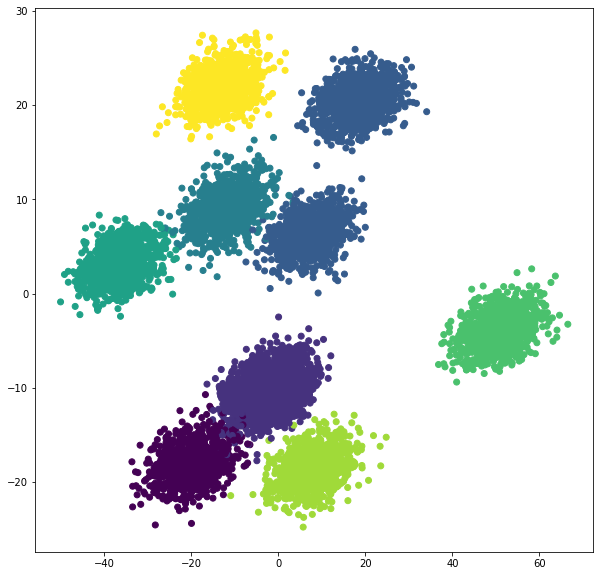

In [117]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
t = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t)

จากกราฟ มีกลุ่มข้อมูลที่แบ่งเป็นสีได้8สี ดังนั้นจึงทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม

*การหาค่า k ที่เหมาะสมของ data*

**การหาค่า k ด้วยวิธี The elbow method**





In [60]:
kmeans.inertia_  #ค่าของ SSE Sum of Squared error

1586022.791622691

In [118]:
SSE = list()
for a in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = a , random_state = 2021)
    YY = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [62]:
SSE

[11966550.962678483,
 8596940.011299517,
 6729889.143185041,
 5234830.487597061,
 3908724.9400010095,
 2885596.483636631,
 2210026.7534305393,
 1586022.791622691]

จากค่าที่ได้มาทำการ plot กราฟ เพื่อตรวจดูว่ามีทั้งหมดกี่กลุ่ม

In [76]:
matplotlib.rcParams['figure.figsize']=[10,10] #ขนาดของกราฟ

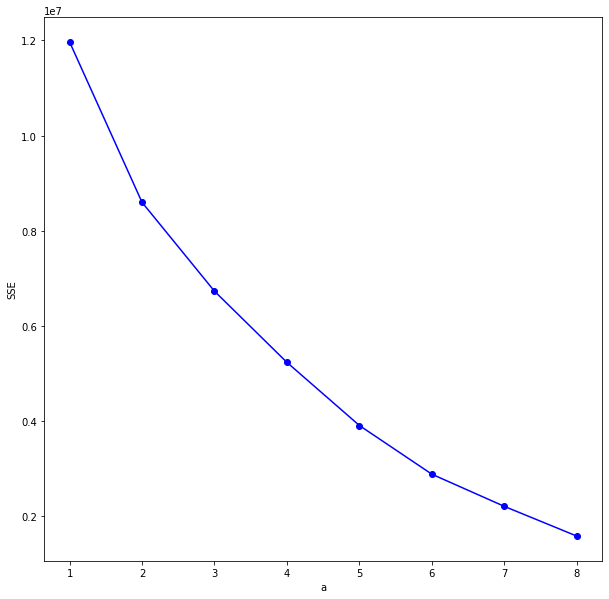

In [119]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('a')
plt.ylabel('SSE');

************

In [83]:
matplotlib.rcParams['figure.figsize']=[10,10] #กำหนดขนาดกราฟ

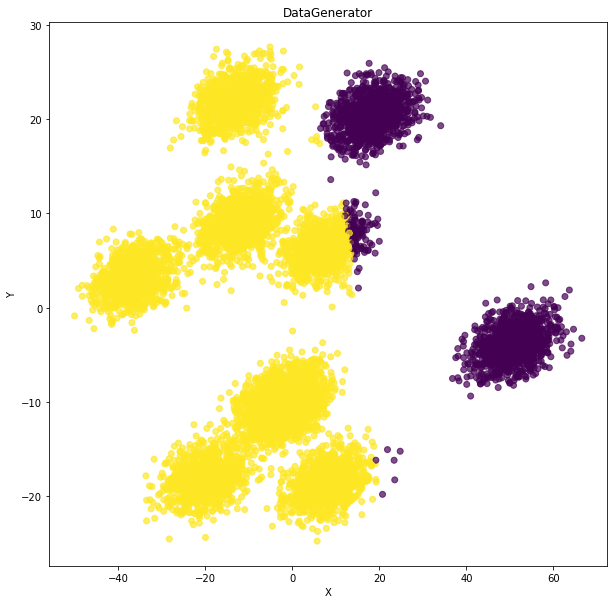

In [121]:
kmeans = KMeans(n_clusters = 2,random_state=2021)
kmeans.fit(Data)
t = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟ หลังจากที่ได้ทำการจัดกลุ่ม k เท่ากับ 2 กลุ่ม

# 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

จากกราฟข้างต้น เนื่องจากมีการทับซ้อนของข้อมูล ดังนั้นจะเป็ฯการลด Dimension 

*****วิธี MDS*****

# **1)Import**

In [108]:
from sklearn.manifold import MDS


# **2)Define**

In [109]:
mds = MDS(n_components=2)


# **3)fit transform**

In [110]:
new_mds = mds.fit_transform(Data)

4)ทำการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล

In [122]:
kmeans_23 = KMeans(n_clusters=4,random_state=2021)
kmeans_23.fit(Data)
g = kmeans_23.predict(Data)

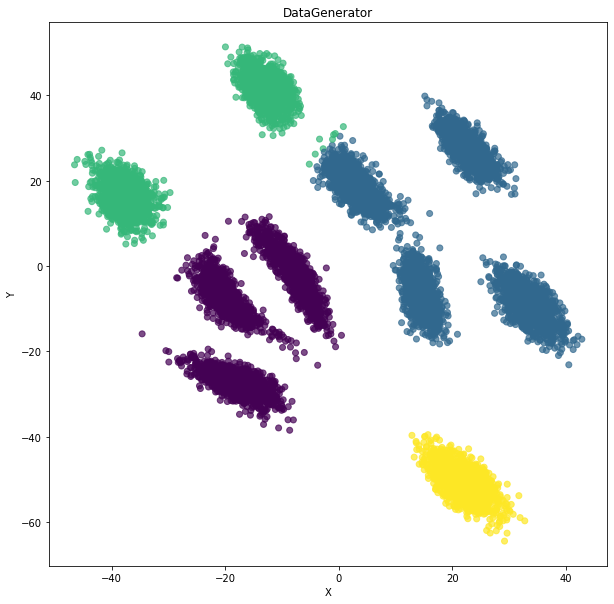

In [112]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');


# 4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

กราฟที่ 1 กราฟ PCA

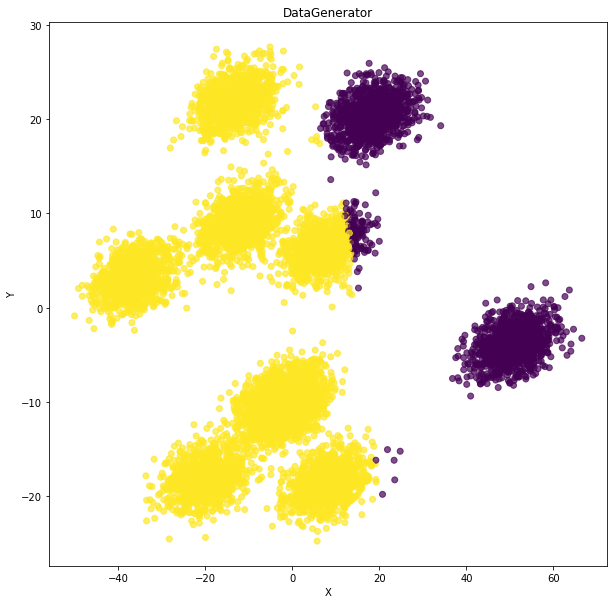

In [123]:

plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');


กราฟที่ 2 กราฟ MDS



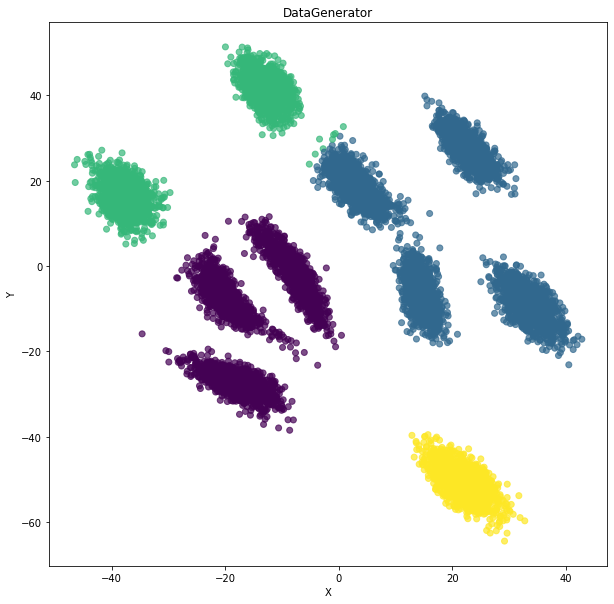

In [114]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟที่ 1 กราฟ PCA และ กราฟที่ 2 กราฟ MDS จะเห็นการกระจายของข้อมูลที่แตกต่างกัน